## Visualizing Gaussian/Normal Distribution

In [1]:
# a bit of setup
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from images2gif import writeGif
from PIL import Image
from scipy.stats import norm

%matplotlib inline

## Gaussian Distribution Parameters 


In [2]:
# Feel free to play with this
mu, sigma = 0, 1

## Visualization

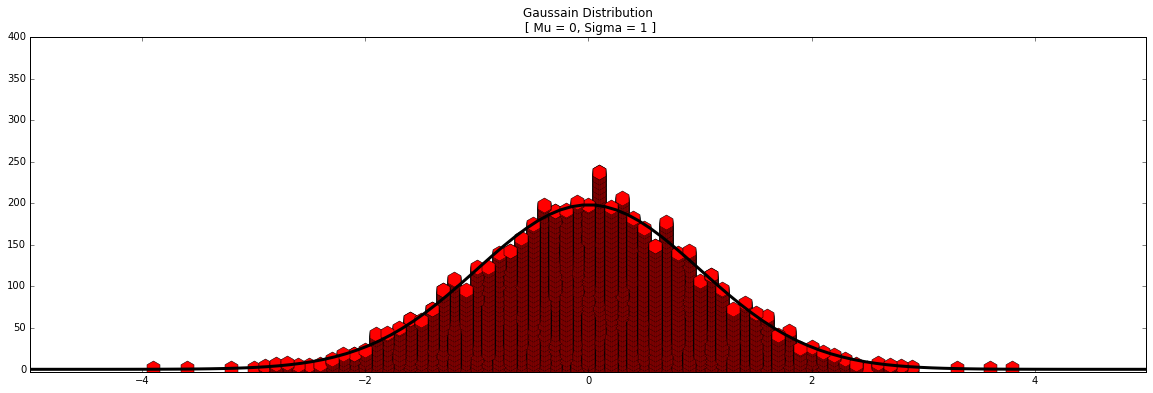

In [7]:
# Convert pyplot to pil image
def read_pil_image_from_plt(plt):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    return Image.open(buf)

# Figure
fig = plt.figure(figsize=(20,6))

samples_per_iter = 50
num_iter = 100

height = 1/(sigma*(np.sqrt(2*np.pi)))
disp_bin_size = 0.1
disp_x_range = [-5*sigma, 5*sigma]
disp_y_range = [-3, 400]
disp_bin_explen = int(-np.log10(disp_bin_size))
disp_bins = {round(i, disp_bin_explen): 0 for i in np.arange(disp_x_range[0], disp_x_range[1], disp_bin_size)}

# Gif animation images
gif_images = []

pdf_x = np.linspace(disp_x_range[0], disp_x_range[1], 100)

samples = np.zeros((num_iter*samples_per_iter, 2))
for iter_no in range(num_iter):
    plt.gca().cla()
    
    # Setup plot
    ax = plt.gca()
    ax.set_axis_bgcolor('white')
    plt.title("Gaussain Distribution\n [ Mu = {}, Sigma = {} ]".format(mu, sigma))
    plt.xlim(disp_x_range)
    plt.ylim(disp_y_range)
    
    # Sample samples_per_iter points from normal distribution
    samples_binned = [round(s, disp_bin_explen) for s in np.random.normal(mu, sigma, samples_per_iter)]
    
    # Map with bins
    for i, s in enumerate(samples_binned):
        disp_bins[s] += 1
        samples[iter_no*samples_per_iter+i]= [s, disp_bins[s]]
        
    # Draw samples
    plt.plot(samples[:, 0], samples[:, 1], c="r", marker="h", markersize=15, alpha=1.0, linestyle = 'None')
    
    # Draw PDF
    plt.plot(pdf_x, disp_bins[mu]*(1/height)*norm.pdf(pdf_x, mu, sigma), "k-", linewidth=3)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    # GIF
    gif_images.append(read_pil_image_from_plt(plt))
plt.clf()
writeGif("./gaussian.gif", gif_images, duration=0.01, dither=0)

<img src="./gaussian.gif"><img>